# Matching Resume with Data Science Jobs

Author: Li Liu @Uchicago

12/24/2018

Data Source: https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us#fulltimeAT.csv

Source of Data Source: Indeed.com

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [180]:
#Jobs in Chicago, IL as example
df=pd.read_csv("fulltimeCHI.csv")
df=df.drop('location',axis=1)
df.head()

,position,company,description,numreview
0,Senior Data Analyst,NORC at the University of Chicago,"<span id=""job_summary"" class=""summary""><div><d...",370 reviews
1,Developer / Quantitative Analyst (Entry Level)...,DV Trading LLC,"<span id=""job_summary"" class=""summary""><div><p...",6 reviews
2,Computational Scientist,The University of Chicago,"<span id=""job_summary"" class=""summary""><div><h...",368 reviews
3,Junior Quantitative Researcher - Machine Learning,Akuna Capital,"<span id=""job_summary"" class=""summary""><b>Abou...",6 reviews
4,"Data Scientist / Quantitative Researcher, Syst...",DRW,"<span id=""job_summary"" class=""summary"">DRW is ...",NaN


In [96]:
#Locate positions with certain keyowrds
df[df['position'].str.contains("marketing",case=False)]

,position,company,description,numreview
127,Digital Marketing Data Analyst,BOEING,"<span id=""job_summary"" class=""summary""><div>Ch...","5,550 reviews"
166,Marketing Research Analyst,"Phoenix Tree Publishing, Inc.","<span id=""job_summary"" class=""summary""><p><b>J...",NaN
191,"Global Growth Manager, Engagement and Retentio...",The Climate Corporation,"<span id=""job_summary"" class=""summary""><div><p...",11 reviews
238,Director of Marketing,Civis Analytics,"<span id=""job_summary"" class=""summary"">About t...",NaN
264,Sr. Director of Marketing,H5,"<span id=""job_summary"" class=""summary""><div><p...",5 reviews
280,E-Commerce Marketing Manager,Dyson,"<span id=""job_summary"" class=""summary""><div><d...",209 reviews
297,Digital Marketing Manager,Brad's Deals,"<span id=""job_summary"" class=""summary"">We are ...",NaN
299,Marketing Manager (Demand Generation),Walker Sands Communications,"<span id=""job_summary"" class=""summary""><div><p...",NaN
317,"Partner, Affiliate, & SEM Marketing Specialist",BOEING,"<span id=""job_summary"" class=""summary""><div>Ch...","5,550 reviews"
362,Digital Marketing Analyst,Brad's Deals,"<span id=""job_summary"" class=""summary"">We are ...",NaN


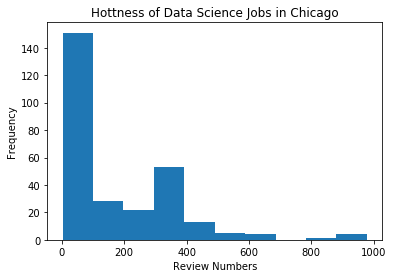

In [182]:
#Plot the histogram of reviews
df['rev']=df['numreview'].str.split(' ').str[0]
df['rev']=pd.to_numeric(df['rev'], errors='coerce')
df['rev'].plot(kind='hist')
plt.xlabel("Review Numbers")
plt.title('Hottness of Data Science Jobs in Chicago')
plt.show()

In [229]:
#Find hottest positions
df.sort_values('rev',ascending=False).iloc[0:5]

,position,company,description,numreview,rev,des_new,Jac-Sim,Cos-Sim
386,MGS Physical Analysis Senior Scientist- Chicag...,Mars,"<span id=""job_summary"" class=""summary""><div><p...",978 reviews,978.0,A mutually rewarding experience. Work. Realize...,0.033143,0.575659
349,Principal Product Development Scientist - Chic...,Mars,"<span id=""job_summary"" class=""summary""><div><p...",978 reviews,978.0,A mutually rewarding experience. Work. Realize...,0.037887,0.478888
419,Corporate Research Analyst,Grant Thornton,"<span id=""job_summary"" class=""summary""><div><d...",919 reviews,919.0,Corporate Research Analyst(Job Number: 040640)...,0.044521,0.401181
142,Quantitative Equity Trading Research Analyst,Charles Schwab,"<span id=""job_summary"" class=""summary""><div>De...",885 reviews,885.0,"Description: Chicago - IL, IL150SW, 150 S Wack...",0.050251,0.334293
284,"Senior Credit Research Analyst, North American...",Aviva,"<span id=""job_summary"" class=""summary""><div><p...",868 reviews,868.0,"Senior Credit Research Analyst, North American...",0.033501,0.427410


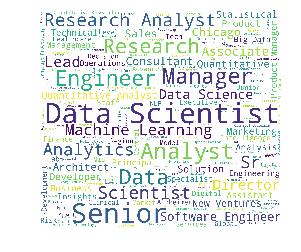

In [184]:
#Word Cloud of Positions
wc = WordCloud(stopwords=STOPWORDS,background_color='white',
               width=2000,height=1800).generate(" ".join(df['position']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [185]:
#Cleaning the "description" column
desc=[]
for i in range(df.shape[0]):
    new=df.iloc[i]['description']
    new=new.replace('\n',' ')
    new=new.replace('</div>','')
    new=new.replace('</p>','')
    new=new.replace('</li>','')
    new=new.replace('<li>','')
    new=new.replace('<p>','')
    new=new.replace('</ul>','')
    new=new.replace('<br>','')
    new=new.replace('</div>','')
    new=new.replace('<div>','')
    new=new.replace('</span>','')
    new=new.replace('</div>','')
    new=new.replace('</span>','')
    new=new.replace('<ul>',' ')
    new=new.replace('</b>','')
    new=new.replace('<b>','')
    new=new.replace('<span id="job_summary" class="summary">','')
    new=new.replace('<h2 class="jobSectionHeader">','')
    desc.append(new)
df['des_new']=desc

### Read in resume in pdf format

In [227]:
from tika import parser

raw = parser.from_file('resume.pdf')
candidate=raw['content'].replace('\n','').replace('\uf0b7','').replace("  "," ")

In [228]:
candidate

'FIRSTNAME INITIAL LASTNAMELI LIU5608 S. Harper Avenue, Chicago, IL 60637 | Phone: (812) 287-3072 | Email: liu431@uchicago.eduWebsite: https://github.com/liu431PROFILE Relevant Skills: Data Science, Marketing Analytics, Machine Learning Technical Skills: Proficient in MS Office, Python, R, SQL, MATLAB, Tableau, Spark, Unix Awards: UC Graduate Scholarships (Oct. 2018 – Jun. 2020); IU Research Grant (Spring 2017)EDUCATION       University of Chicago                                                                     Chicago, ILM.A., Computational Social Science                                                     expected Jun. 2020 Relevant Courses: Python Programming, Computational Modeling, Spatial Data Science, Quantitative Marketing, Causal Inference, Unsupervised Learning, Statistical Inference, Algorithms Indiana University                                                                   Bloomington, INB.S., Applied Mathematics and Statistics                                        

### Matching

#### Jaccard Similarity

In [188]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [189]:
score=[]
for i in range(df.shape[0]):
    a=df['des_new'].iloc[i]
    b=candidate
    score.append(get_jaccard_sim(a,b))
df["Jac-Sim"]=np.array(score)    

In [191]:
df.sort_values('Jac-Sim',ascending=False).iloc[0:5]

,position,company,description,numreview,rev,des_new,Jac-Sim
72,Senior Data Scientist,MARC USA LLC,"<span id=""job_summary"" class=""summary""><div><p...",NaN,NaN,"MARC USA is a national, full-service advertisi...",0.078788
64,Senior Data Scientist,Conversant Media,"<span id=""job_summary"" class=""summary""><div><d...",20 reviews,20.0,OVERVIEW As a Senior Data Scientist in our De...,0.075221
48,Machine Learning Data Scientist,Wolverine Trading,"<span id=""job_summary"" class=""summary""><div><d...",10 reviews,10.0,"<h1 class=""jobSectionHeader"">Machine Learning ...",0.074844
35,Data Scientist,Capax Global LLC,"<span id=""job_summary"" class=""summary""><div><d...",NaN,NaN,Do you want to work at the forefront of artifi...,0.072165
89,"Mid-Level Data Scientist (Python, Pandas, NumP...",Workbridge Associates,"<span id=""job_summary"" class=""summary""><div><p...",40 reviews,40.0,A thriving company located in Downtown Chicago...,0.069388


#### Cosine Similarity

calculates similarity by measuring the cosine of angle between two vectors

In [196]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [197]:
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [206]:
score=[]
for i in range(df.shape[0]):
    a=df.iloc[i]['description']
    b=candidate
    score.append(get_cosine_sim(a,b)[0,1])
df["Cos-Sim"]=np.array(score) 

In [210]:
df.sort_values('Cos-Sim',ascending=False).iloc[0:5]

,position,company,description,numreview,rev,des_new,Jac-Sim,Cos-Sim
15,Arity-Data Scientist-Cons II,Allstate,"<span id=""job_summary"" class=""summary""><div><p...","5,375 reviews",NaN,Arity is a technology company founded by The A...,0.058824,0.600460
194,Medical Physicist,Ann & Robert H. Lurie Children’s Hospital of C...,"<span id=""job_summary"" class=""summary""><div><h...",178 reviews,178.0,Overview </h2> To provide clinical and researc...,0.042710,0.593789
157,Sr. Data Scientist / Manager - Prescriptive An...,Allstate,"<span id=""job_summary"" class=""summary""><div><p...","5,375 reviews",NaN,Where good people build rewarding careers. Thi...,0.055021,0.591382
13,Arity - Senior Data Scientist,Allstate,"<span id=""job_summary"" class=""summary""><div><p...","5,375 reviews",NaN,Where good people build rewarding careers. Thi...,0.054608,0.581180
386,MGS Physical Analysis Senior Scientist- Chicag...,Mars,"<span id=""job_summary"" class=""summary""><div><p...",978 reviews,978.0,A mutually rewarding experience. Work. Realize...,0.033143,0.575659
